
# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [33]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [34]:
%run parse_data.ipynb

df.describe()



 Created df_game_iv with 2344 games and 16 columns.


,game_id,home_team,away_team,home_score,away_score,home_win_prob,diff_pass_off,diff_rush_off,diff_rz,diff_sack,diff_def_pass,diff_turnover,diff_third_down,diff_fg,diff_top,diff_pen
0,2017_01_ARI_DET,DET,ARI,35,23,0.603448,0.154381,0.141529,0.050000,-0.002727,-0.154381,3.0,0.100000,3.013248,NaN,-77.0
1,2017_01_ATL_CHI,CHI,ATL,17,23,0.425000,-0.580534,0.453888,-0.106061,-0.028409,0.580534,0.0,-0.069930,1.777357,NaN,-13.0
2,2017_01_BAL_CIN,CIN,BAL,0,20,0.000000,-0.796996,0.051482,-0.214286,-0.083333,0.796996,-4.0,-0.120879,NaN,NaN,-23.0
3,2017_01_CAR_SF,SF,CAR,3,23,0.115385,-0.522071,-0.285847,-0.272727,-0.102564,0.522071,0.0,-0.356643,0.767280,NaN,6.0
4,2017_01_IND_LA,LA,IND,46,9,0.836364,1.361458,-0.047786,0.066667,0.127742,-1.361458,4.0,0.357143,3.094148,NaN,30.0


,home_score,away_score,home_win_prob,diff_pass_off,diff_rush_off,diff_rz,diff_sack,diff_def_pass,diff_turnover,diff_third_down,diff_fg,diff_top,diff_pen
count,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2305.000000,2344.000000,2344.000000,2344.000000,2344.000000,1815.000000,0.0,2344.000000
mean,23.779010,21.927474,0.519785,0.004256,-0.010811,0.002372,0.002782,-0.004256,0.045648,0.019409,0.112704,NaN,2.268771
std,10.154494,9.842457,0.176142,0.464265,0.288061,0.122416,0.070155,0.464265,1.768520,0.194559,1.719014,NaN,36.708171
min,0.000000,0.000000,0.000000,-1.589303,-1.801176,-0.863636,-0.423077,-2.159788,-6.000000,-0.651515,-6.347030,NaN,-122.000000
25%,17.000000,16.000000,0.425000,-0.306462,-0.200528,-0.068182,-0.040078,-0.300871,-1.000000,-0.113636,-0.778405,NaN,-22.000000
50%,24.000000,21.000000,0.522727,0.000171,-0.021433,0.000000,0.001951,-0.000171,0.000000,0.018296,0.105750,NaN,2.000000
75%,30.000000,28.000000,0.622222,0.300871,0.177973,0.071429,0.046379,0.306462,1.000000,0.150000,0.921132,NaN,26.000000
max,70.000000,59.000000,1.000000,2.159788,0.950608,0.846154,0.310345,1.589303,6.000000,0.686869,6.267906,NaN,150.000000


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [35]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [37]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)    
    df_central = df.select_dtypes(include=[np.number]).apply(lambda x: central(x), axis=0)
    round_dict = {
        'home_score': 1, 
        'away_score': 1,
        'home_win_prob': 4,
        'diff_pass_off': 6, 
        'diff_rush_off': 6,
        'diff_rz': 6, 
        'diff_sack': 6,
        'diff_def_pass': 6,
        'diff_turnover': 6,
        'diff_third_down': 6,
        'diff_fg': 6,
        'diff_top': 3,
        'diff_pen': 6
    }
    df_central = df_central.round(round_dict)
    row_labels = ('mean', 'median', 'mode')
    df_central.index = row_labels
    display(df_central)
display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,home_score,away_score,home_win_prob,diff_pass_off,diff_rush_off,diff_rz,diff_sack,diff_def_pass,diff_turnover,diff_third_down,diff_fg,diff_top,diff_pen
mean,23.8,21.9,0.5198,0.004256,-0.010811,0.002372,0.002782,-0.004256,0.045648,0.019409,0.112704,NaN,2.268771
median,24.0,21.0,0.5227,0.000171,-0.021433,NaN,0.001951,-0.000171,0.000000,0.018296,NaN,NaN,2.000000
mode,20.0,20.0,0.6667,-1.589303,-1.801176,0.000000,0.000000,-2.159788,0.000000,0.000000,NaN,NaN,-5.000000


<br>

Let's repeat for a dispersion table:

</br>

In [38]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    numeric_df = df.select_dtypes(include=[np.number])
    round_dict = {
        'home_score': 1, 
        'away_score': 1,
        'home_win_prob': 4,
        'diff_pass_off': 3,
        'diff_rush_off': 3,
        'diff_rz': 3,
        'diff_sack': 3,
        'diff_def_pass': 3,
        'diff_turnover': 3,
        'diff_third_down': 3,
        'diff_fg': 3,
        'diff_top': 3,
        'diff_pen': 3
    }
    df_dispersion = numeric_df.apply(lambda x: dispersion(x), axis=0).round(round_dict)
    row_labels_dispersion = ['st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR']
    df_dispersion.index = row_labels_dispersion
    display(df_dispersion)
display_dispersion_table(num=2)

<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,home_score,away_score,home_win_prob,diff_pass_off,diff_rush_off,diff_rz,diff_sack,diff_def_pass,diff_turnover,diff_third_down,diff_fg,diff_top,diff_pen
st.dev.,10.2,9.8,0.1761,0.464,0.288,0.122,0.070,0.464,1.768,0.195,1.719,NaN,36.7
min,0.0,0.0,0.0000,-1.589,-1.801,-0.864,-0.423,-2.160,-6.000,-0.652,-6.347,NaN,-122.0
max,70.0,59.0,1.0000,2.160,0.951,0.846,0.310,1.589,6.000,0.687,6.268,NaN,150.0
range,70.0,59.0,1.0000,3.749,2.752,1.710,0.733,3.749,12.000,1.338,12.615,NaN,272.0
25th,17.0,16.0,0.4250,-0.306,-0.201,NaN,-0.040,-0.301,-1.000,-0.114,NaN,NaN,-22.0
75th,30.0,28.0,0.6222,0.301,0.178,NaN,0.046,0.306,1.000,0.150,NaN,NaN,26.0
IQR,13.0,12.0,0.1972,0.607,0.379,NaN,0.086,0.607,2.000,0.264,NaN,NaN,48.0


Let's save the variables in easier-to-use variable names:

In [14]:
home_score      = df['home_score']
away_score      = df['away_score']
y               = df['home_win_prob']
diff_pass_off   = df['diff_pass_off']
diff_rush_off   = df['diff_rush_off']
diff_rz         = df['diff_rz']
diff_sack       = df['diff_sack']
diff_def_pass   = df['diff_def_pass']
diff_turnover   = df['diff_turnover']
diff_third_down = df['diff_third_down']
diff_fg         = df['diff_fg']
diff_top        = df['diff_top']
diff_pen        = df['diff_pen']

Let's create scatterplots for the DV (home_win_prob) vs. each of the ten IVs :

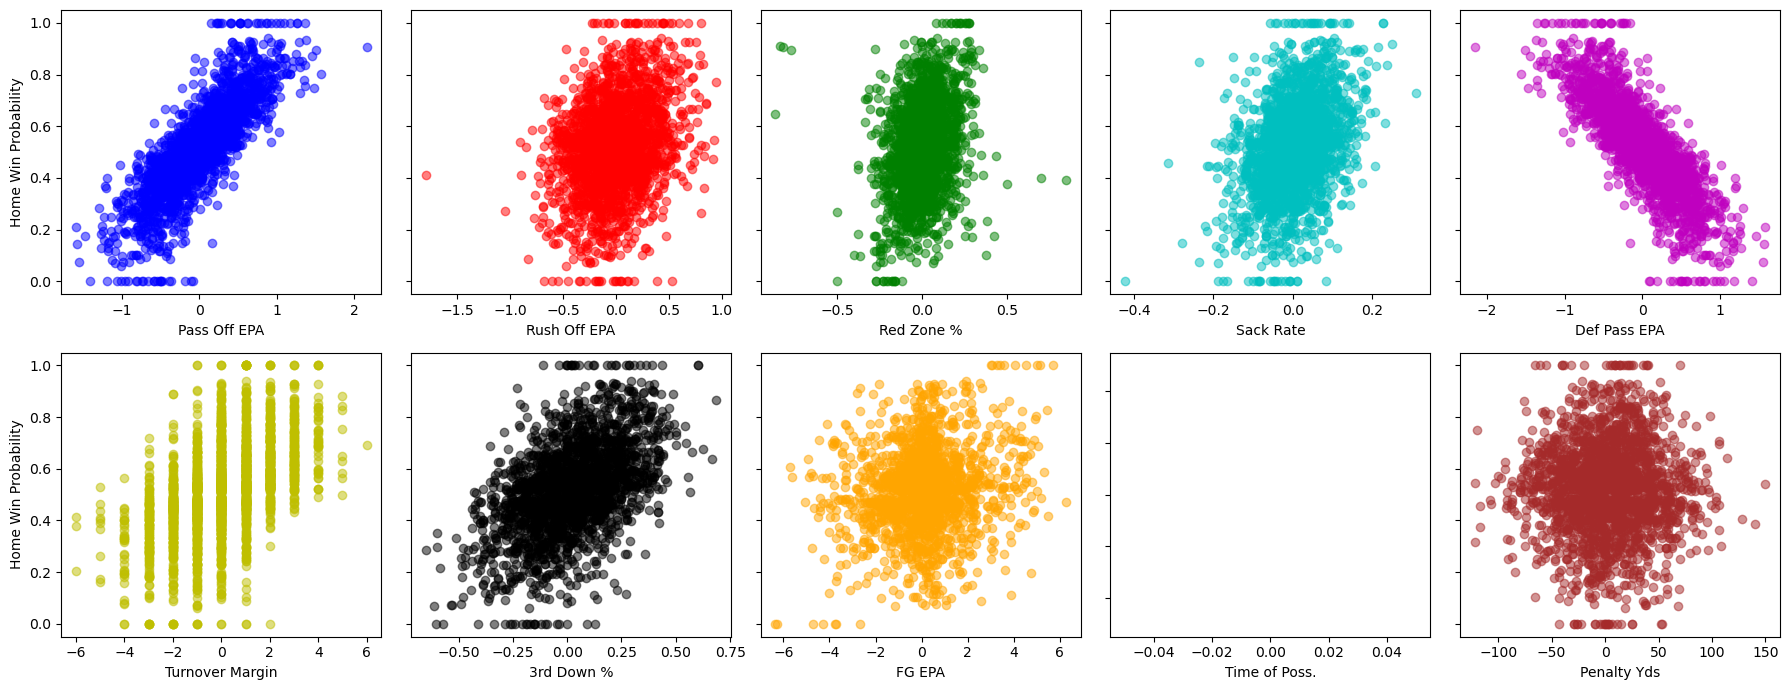

In [39]:
fig,axs = plt.subplots( 2, 5, figsize=(18,7), tight_layout=True )
axs[0,0].scatter( df['diff_pass_off'],  df['home_win_prob'], alpha=0.5, color='b' )
axs[0,1].scatter( df['diff_rush_off'],  df['home_win_prob'], alpha=0.5, color='r' )
axs[0,2].scatter( df['diff_rz'],        df['home_win_prob'], alpha=0.5, color='g' )
axs[0,3].scatter( df['diff_sack'],      df['home_win_prob'], alpha=0.5, color='c' )
axs[0,4].scatter( df['diff_def_pass'],  df['home_win_prob'], alpha=0.5, color='m' )
axs[1,0].scatter( df['diff_turnover'],   df['home_win_prob'], alpha=0.5, color='y' )
axs[1,1].scatter( df['diff_third_down'], df['home_win_prob'], alpha=0.5, color='k' )
axs[1,2].scatter( df['diff_fg'],         df['home_win_prob'], alpha=0.5, color='orange' )
axs[1,3].scatter( df['diff_top'],        df['home_win_prob'], alpha=0.5, color='purple' )
axs[1,4].scatter( df['diff_pen'],        df['home_win_prob'], alpha=0.5, color='brown' )
xlabels = (
    'Pass Off EPA', 'Rush Off EPA', 'Red Zone %', 'Sack Rate', 'Def Pass EPA',
    'Turnover Margin', '3rd Down %', 'FG EPA', 'Time of Poss.', 'Penalty Yds'
)
axs_list = axs.flatten()
[ax.set_xlabel(lbl) for ax,lbl in zip(axs_list,xlabels)]
axs[0,0].set_ylabel('Home Win Probability')
axs[1,0].set_ylabel('Home Win Probability')
[ax.set_yticklabels([]) for ax in axs_list[1:] if ax not in [axs[0,0], axs[1,0]]]
plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [41]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


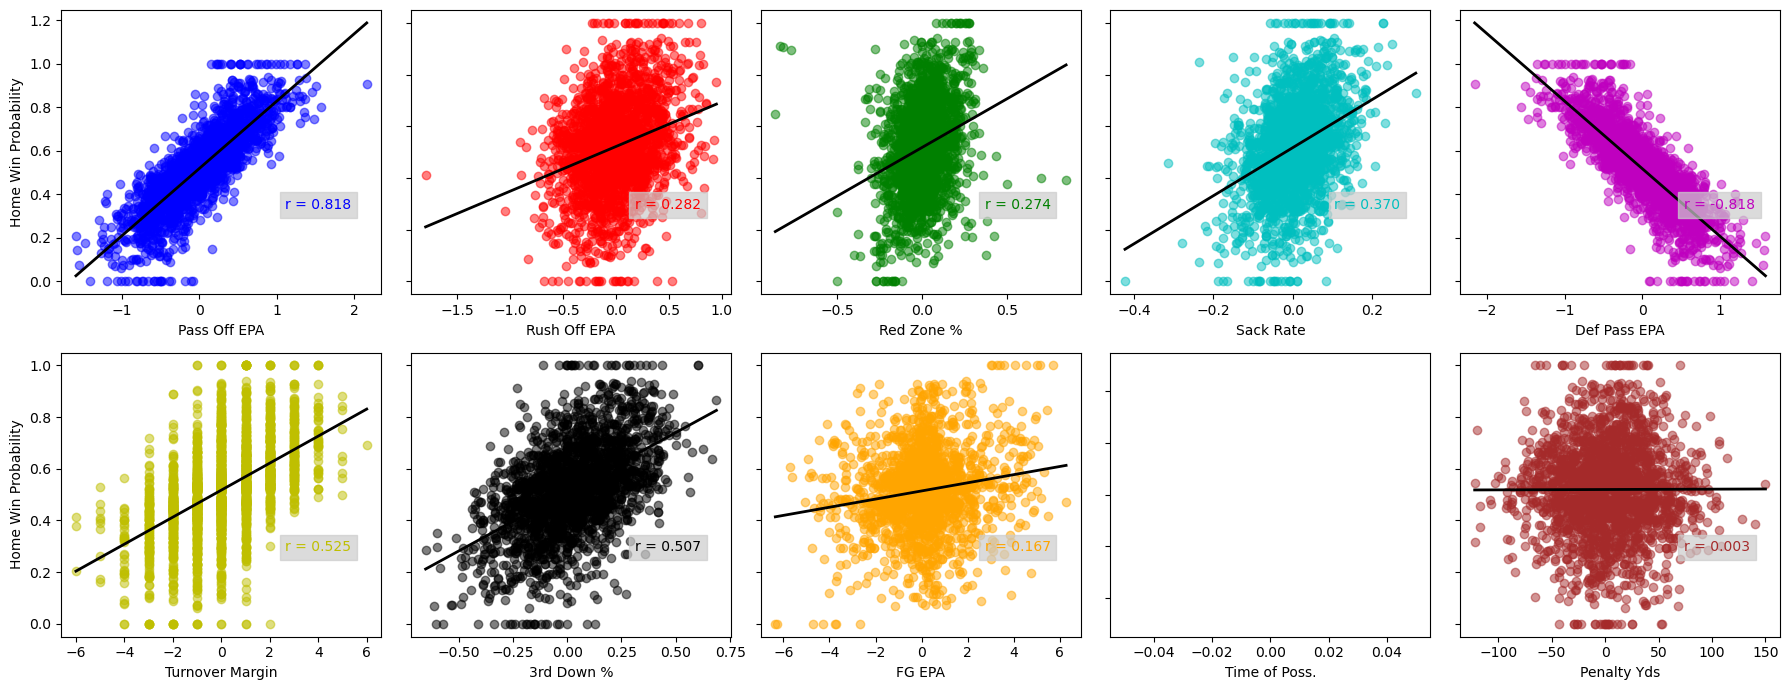

In [43]:
fig,axs = plt.subplots( 2, 5, figsize=(18,7), tight_layout=True )
ivs     = [
    df['diff_pass_off'], df['diff_rush_off'], df['diff_rz'], df['diff_sack'], df['diff_def_pass'],
    df['diff_turnover'], df['diff_third_down'], df['diff_fg'], df['diff_top'], df['diff_pen']
]
colors  = ['b','r','g','c','m','y','k','orange','purple','brown']
axs_list = axs.flatten()
for ax,x,c in zip(axs_list, ivs, colors):
    ax.scatter( x, df['home_win_prob'], alpha=0.5, color=c )
    x_clean = x.replace([np.inf, -np.inf], np.nan).dropna()
    y_clean = df['home_win_prob'][x_clean.index]
    if len(x_clean) > 1 and x_clean.std() > 0:
        plot_regression_line(ax, x_clean, y_clean, color='k', ls='-', lw=2)
        r = corrcoeff(x_clean, y_clean)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))
xlabels = (
    'Pass Off EPA', 'Rush Off EPA', 'Red Zone %', 'Sack Rate', 'Def Pass EPA',
    'Turnover Margin', '3rd Down %', 'FG EPA', 'Time of Poss.', 'Penalty Yds'
)
[ax.set_xlabel(s) for ax,s in zip(axs_list,xlabels)]
axs[0,0].set_ylabel('Home Win Probability')
axs[1,0].set_ylabel('Home Win Probability')
[ax.set_yticklabels([])  for ax in axs_list[1:] if ax not in [axs[0,0], axs[1,0]]]
plt.show()

The correlation coefficients are all relatively low expect for passing offense and defense, suggesting no clear linear correlation between the DV and the other eight IVs.


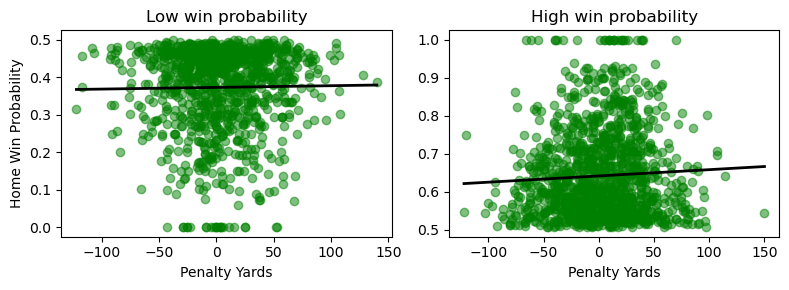

In [47]:
i_low     = df['home_win_prob'] <= 0.5
i_high    = df['home_win_prob'] > 0.5

fig,axs = plt.subplots( 1, 2, figsize=(8,3), tight_layout=True )
i       = [df['diff_pen']]
for ax,i in zip(axs, [i_low, i_high]):
    ax.scatter( df['diff_pen'][i], df['home_win_prob'][i], alpha=0.5, color='g' )
    plot_regression_line(ax, df['diff_pen'][i], df['home_win_prob'][i], color='k', ls='-', lw=2)
[ax.set_xlabel('Penalty Yards')  for ax in axs] 
axs[0].set_title('Low win probability')
axs[0].set_ylabel('Home Win Probability')
axs[1].set_title('High win probability')
plt.show()

The linear trend lines in the figures above appear to the visual patterns:

- Win probabilty appears to be unrelated with penatly yards in low win probabilties.
- Win probabilty appears to increasy slighlty with pen yards in low prob.

Linear regression suggests that the penatly yards are not relevant, though in reality they are often so callled "drive killers". To see why let's highlight the average for each win prob.

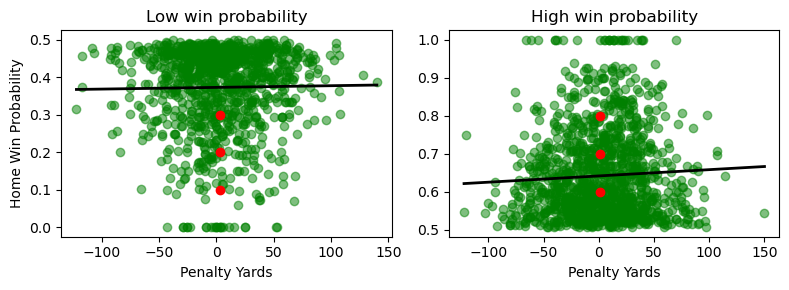

In [49]:
fig,axs = plt.subplots( 1, 2, figsize=(8,3), tight_layout=True )
for ax,i in zip(axs, [i_low, i_high]):
    ax.scatter( df['diff_pen'][i], df['home_win_prob'][i], alpha=0.5, color='g' )
    plot_regression_line(ax, df['diff_pen'][i], df['home_win_prob'][i], color='k', ls='-', lw=2)
[axs[0].plot(df['diff_pen'][i_low].mean(), p, 'ro')  for p in [0.1,0.2,0.3]]
[axs[1].plot(df['diff_pen'][i_high].mean(), p, 'ro') for p in [0.6,0.7,0.8]]
[ax.set_xlabel('Penalty Yards')  for ax in axs] 
axs[0].set_title('Low win probability')
axs[0].set_ylabel('Home Win Probability')
axs[1].set_title('High win probability')
plt.show()

These analyses show that the trends associated with just the means are misleading.

Let's now assemble all results into a single figure for reporting purposes:

KeyError: 'turnover_margin'

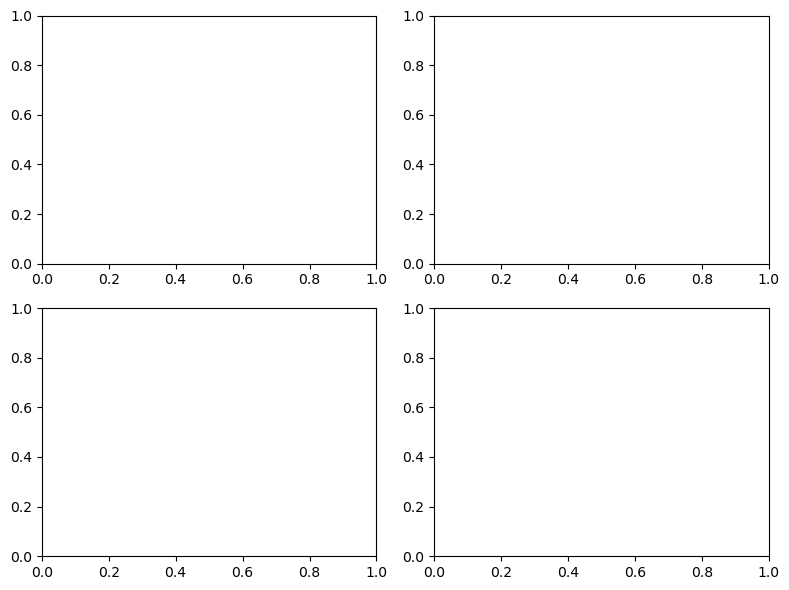

In [50]:
def plot_descriptive() 